<a href="https://colab.research.google.com/github/magotronico/DataAnalysis_and_AI/blob/main/data_science_practice/DataImputation_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Imputation

### Summary

The notebook encapsulates a structured approach to data imputation and analysis, integrating visualization, statistical analysis, and coding best practices. The process ensures that the data is thoroughly cleaned and prepared for any subsequent analysis, with attention to maintaining the integrity and interpretability of the indicators involved.


---
Student: Dilan Gonzalez Castaneda ID: A00831905

### Overview of the Data Imputation Process in the Notebook

The notebook focuses on a comprehensive data analysis and imputation process, particularly handling datasets from various sucursals (branches). The main steps involved in the notebook are:

1. **Data Preprocessing and Initial Analysis:**
   - The notebook begins by loading data from CSV files corresponding to various sucursals. Each CSV file contains columns representing the sucursal name and indicator values for different months (e.g., 12 months ago, 6 months ago, and the current month).
   - Initial exploratory data analysis (EDA) is conducted, including visualizing the distributions of the indicators using histograms, boxplots, and time series plots. This step aims to understand the data structure and identify any irregularities, such as outliers or missing values.

2. **Outlier Detection and Visualization:**
   - Outliers are detected per sucursal for each indicator. This detection is visualized using boxplots and histograms before making any modifications to the data. The visualizations help in assessing the extent of the outliers and deciding the imputation strategy.

3. **Data Imputation:**
   - The notebook implements techniques for imputing missing values and handling outliers. Various statistical methods (e.g., mean, median) are considered to replace outliers and fill in missing data points.
   - A focus is given to keeping the data as realistic as possible, ensuring that the imputations do not distort the original distribution of the data excessively.

4. **Computing Summary Statistics:**
   - The notebook computes key statistical metrics such as mean, standard deviation, range, and variance for each indicator per sucursal. These statistics are intended to provide insights into the central tendency and variability of the data, both before and after the imputation process.

5. **Storing and Saving Results:**
   - The cleaned and imputed data is saved back to CSV files for future use. Additionally, the visualizations generated throughout the notebook (boxplots, histograms, time series) are saved as images, following a consistent naming convention that reflects the content and context.


## Extract

In [2]:
import pandas as pd

# Database path
db_path = '/content/Loan_db1.csv'
# Read the CSV file into a DataFrame
loan_df = pd.read_csv(db_path, encoding='latin1')

# Display the first few rows of the DataFrame
loan_df.head()

,ID_Cliente,Saldo_Insoluto,Saldo_Vencido,Mora_Temprana,Castigos,Capital_Dispersado,Capital_Liquidado,Duración_Préstamo,Tasa_Interés,Estado_Préstamo
0,1,5745.07,232.15,0.0,62.929147,23342.39267,14709.579620,30,10.487822,0
1,2,4792.60,269.45,1.0,NaN,NaN,9024.139188,38,7.337819,0
2,3,5971.53,240.26,0.0,185.634724,16269.05120,10332.974310,38,12.618421,0
3,4,7284.54,311.04,0.0,190.521613,NaN,13421.588010,34,NaN,0
4,5,4648.77,419.72,0.0,196.999188,17064.74017,7866.284645,32,12.453172,1


## Transform

### Rename Columns

In [3]:
# Rename incorrect columns

loan_df.rename(columns={
    'Duración_Préstamo': 'duracion_prestamo',
    'Monto_Préstamo': 'Monto_Prestamo',
    'Tasa_Interés': 'Tasa_Interes',
    'Estado_Préstamo': 'Estado_Prestamo',
    }, inplace=True)

loan_df.columns = loan_df.columns.str.lower()

loan_df.head()


,id_cliente,saldo_insoluto,saldo_vencido,mora_temprana,castigos,capital_dispersado,capital_liquidado,duracion_prestamo,tasa_interes,estado_prestamo
0,1,5745.07,232.15,0.0,62.929147,23342.39267,14709.579620,30,10.487822,0
1,2,4792.60,269.45,1.0,NaN,NaN,9024.139188,38,7.337819,0
2,3,5971.53,240.26,0.0,185.634724,16269.05120,10332.974310,38,12.618421,0
3,4,7284.54,311.04,0.0,190.521613,NaN,13421.588010,34,NaN,0
4,5,4648.77,419.72,0.0,196.999188,17064.74017,7866.284645,32,12.453172,1


### Identification of null values

In [4]:
missing_value = loan_df.isnull().sum()
missing_porcent = (missing_value / len(loan_df)) * 100

# Create a dataFrame to summarize missing value
missing_data_frame = pd.DataFrame({
    'Missing Value': missing_value,
    'Porcent (%)': missing_porcent
})

# Show the summary
print("Missing Values Summary")
print(missing_data_frame)

Missing Values Summary
                    Missing Value  Porcent (%)
id_cliente                      0         0.00
saldo_insoluto                393         3.93
saldo_vencido                 421         4.21
mora_temprana                 382         3.82
castigos                      373         3.73
capital_dispersado            388         3.88
capital_liquidado             410         4.10
duracion_prestamo               0         0.00
tasa_interes                  376         3.76
estado_prestamo                 0         0.00


### DB Stadistics

In [5]:
print(loan_df.dtypes)

id_cliente              int64
saldo_insoluto        float64
saldo_vencido         float64
mora_temprana         float64
castigos              float64
capital_dispersado    float64
capital_liquidado     float64
duracion_prestamo       int64
tasa_interes          float64
estado_prestamo         int64
dtype: object


In [6]:
loan_df['id_cliente'] = loan_df['id_cliente'].astype('category')

# Verify change in data type
print(loan_df.dtypes)

id_cliente            category
saldo_insoluto         float64
saldo_vencido          float64
mora_temprana          float64
castigos               float64
capital_dispersado     float64
capital_liquidado      float64
duracion_prestamo        int64
tasa_interes           float64
estado_prestamo          int64
dtype: object


In [7]:
# Show descriptive stadistics
loan_df.describe()

,saldo_insoluto,saldo_vencido,mora_temprana,castigos,capital_dispersado,capital_liquidado,duracion_prestamo,tasa_interes,estado_prestamo
count,9607.000000,9579.000000,9618.000000,9627.000000,9612.000000,9590.000000,10000.000000,9624.000000,10000.000000
mean,6035.048631,360.008981,0.106883,238.817765,23931.467313,17818.828678,42.671100,11.977033,0.202200
std,4961.015166,297.860791,0.402514,189.180777,18807.457636,14111.963950,34.225147,9.207782,0.401661
min,-883.600000,-85.640000,0.000000,-23.280193,-1476.954920,-396.208296,-14.000000,1.074063,0.000000
25%,4055.050000,237.420000,0.000000,166.263952,16896.325447,12139.067263,29.000000,8.709762,0.000000
50%,5095.310000,306.750000,0.000000,202.082546,20328.236745,15366.079690,37.000000,10.102569,0.000000
75%,6215.795000,380.955000,0.000000,239.437704,24015.089427,18683.937905,45.000000,11.602650,0.000000
max,53895.490000,3035.670000,5.000000,1789.518357,165609.522500,134867.089900,340.000000,76.673150,1.000000


### Outliers Visualization

['saldo_insoluto', 'saldo_vencido', 'castigos', 'capital_dispersado', 'capital_liquidado', 'tasa_interes']


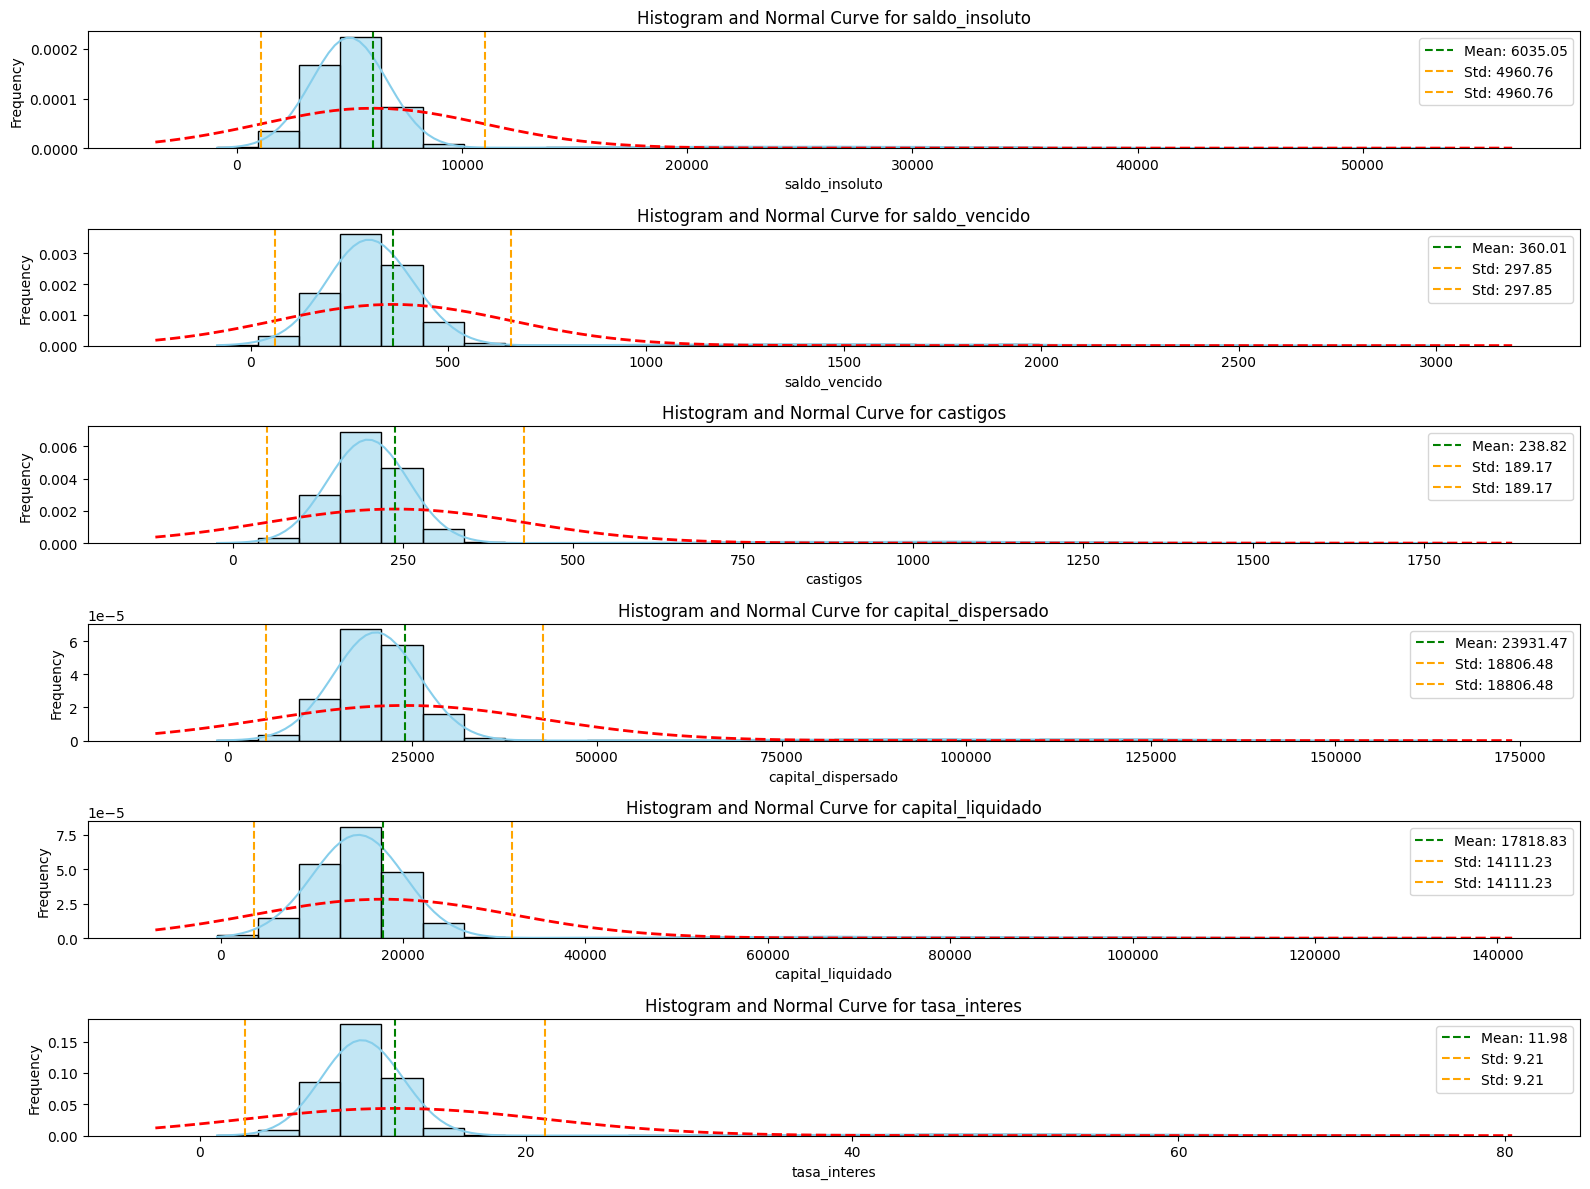

In [8]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Float type variables (in reality, we can put here manually all columns we want to imputate)
float_variables = loan_df.select_dtypes(include=['float64']).columns.tolist()
float_variables.remove('mora_temprana')
print(float_variables)

# Fig size config
plt.figure(figsize=(16, 12))

# Generate hist with normal curve adjugement fir each float var
for i, column in enumerate(float_variables, 1):
    plt.subplot(len(float_variables), 1, i)
    column_data = loan_df[column].dropna()

    # Gen hist
    sns.histplot(column_data, kde=True, stat='density', color='skyblue', bins=30)

    # Add normal curve
    mu, std = stats.norm.fit(column_data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)

    plt.plot(x, p, 'r--', linewidth=2)

    # Draw mean line and standar deviation
    plt.axvline(mu, color='green', linestyle='--', label=f'Mean: {mu:.2f}')
    plt.axvline(mu + std, color='orange', linestyle='--', label=f'Std: {std:.2f}')
    plt.axvline(mu - std, color='orange', linestyle='--', label=f'Std: {std:.2f}')

    plt.title(f'Histogram and Normal Curve for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()



['saldo_insoluto', 'saldo_vencido', 'castigos', 'capital_dispersado', 'capital_liquidado', 'tasa_interes']


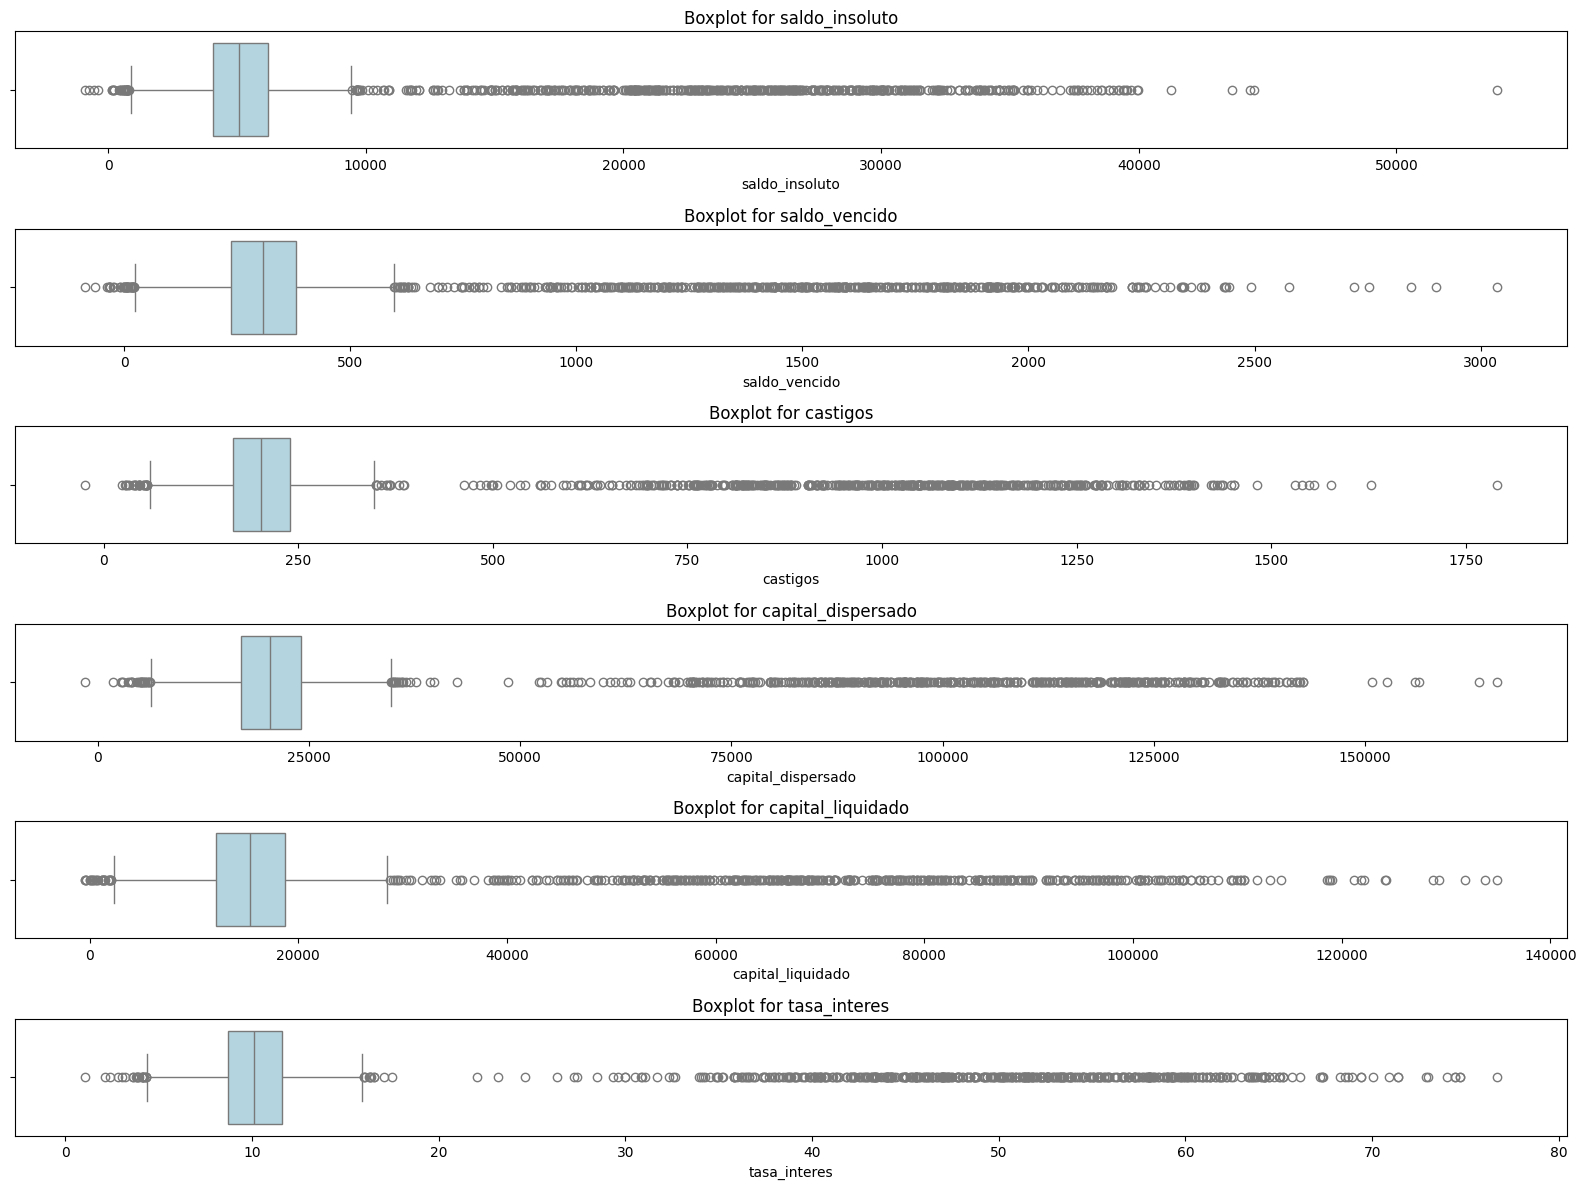

In [9]:
# Float type variables (in reality, we can put here manually all columns we want to imputate)
float_columns = loan_df.select_dtypes(include=['float64']).columns.tolist()
float_columns.remove('mora_temprana')
print(float_variables)

# Gen boxplots for each float var
plt.figure(figsize=(16, 12))

for i, column in enumerate(float_columns, 1):
    plt.subplot(len(float_columns), 1, i)
    sns.boxplot(x=loan_df[column], color='lightblue')
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

### Outliers corrections

In [10]:
# Gen boxtplots and detect outliers
outliers = {}
plt.figure(figsize=(16,12))

for i, column in enumerate(float_columns, 1):
    # Calculate the interquartil range (IQR)
    Q1 = loan_df[column].quantile(0.25)
    Q3 = loan_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers[column] = loan_df[(loan_df[column] < lower_bound) | (loan_df[column] > upper_bound)]

plt.tight_layout()
plt.show()

# Show the outliers identified
for column, outliers_values in outliers.items():
    print(f"Outliers for {column}:")
    print(outliers_values)

<Figure size 1600x1200 with 0 Axes>

Outliers for saldo_insoluto:
     id_cliente  saldo_insoluto  saldo_vencido  mora_temprana    castigos  \
9            10        29069.20         381.86            0.0  228.279804   
10           11        21524.37         392.19            0.0  152.059807   
65           66        35171.80         294.75            0.0   91.445299   
111         112        24801.15         486.42            1.0  100.068924   
116         117        24739.66         344.46            0.0  117.413253   
...         ...             ...            ...            ...         ...   
9931       9932        18654.70         219.67            0.0  215.255682   
9933       9934        19582.39         357.16            0.0  276.349940   
9949       9950        34754.69            NaN            1.0  190.142633   
9950       9951        31508.54         171.56            0.0  148.876294   
9980       9981        21656.54         396.26            0.0  190.558508   

      capital_dispersado  capital_liquidado  d

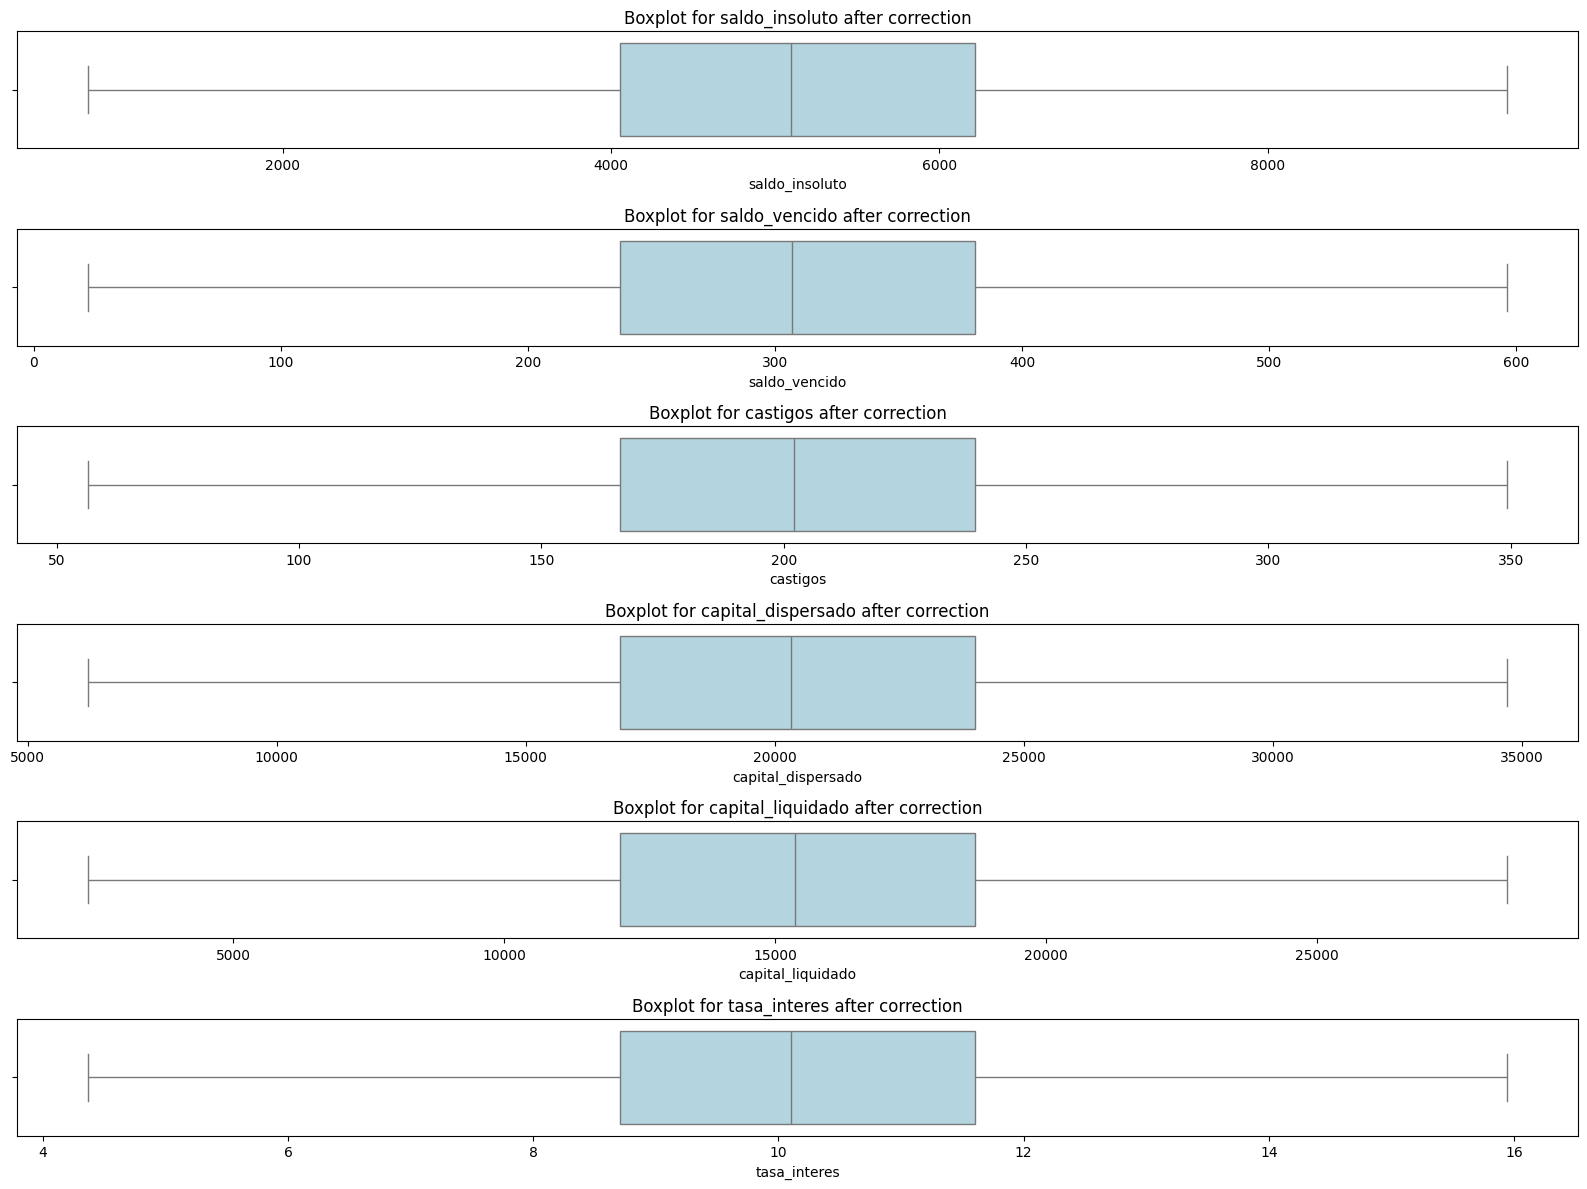

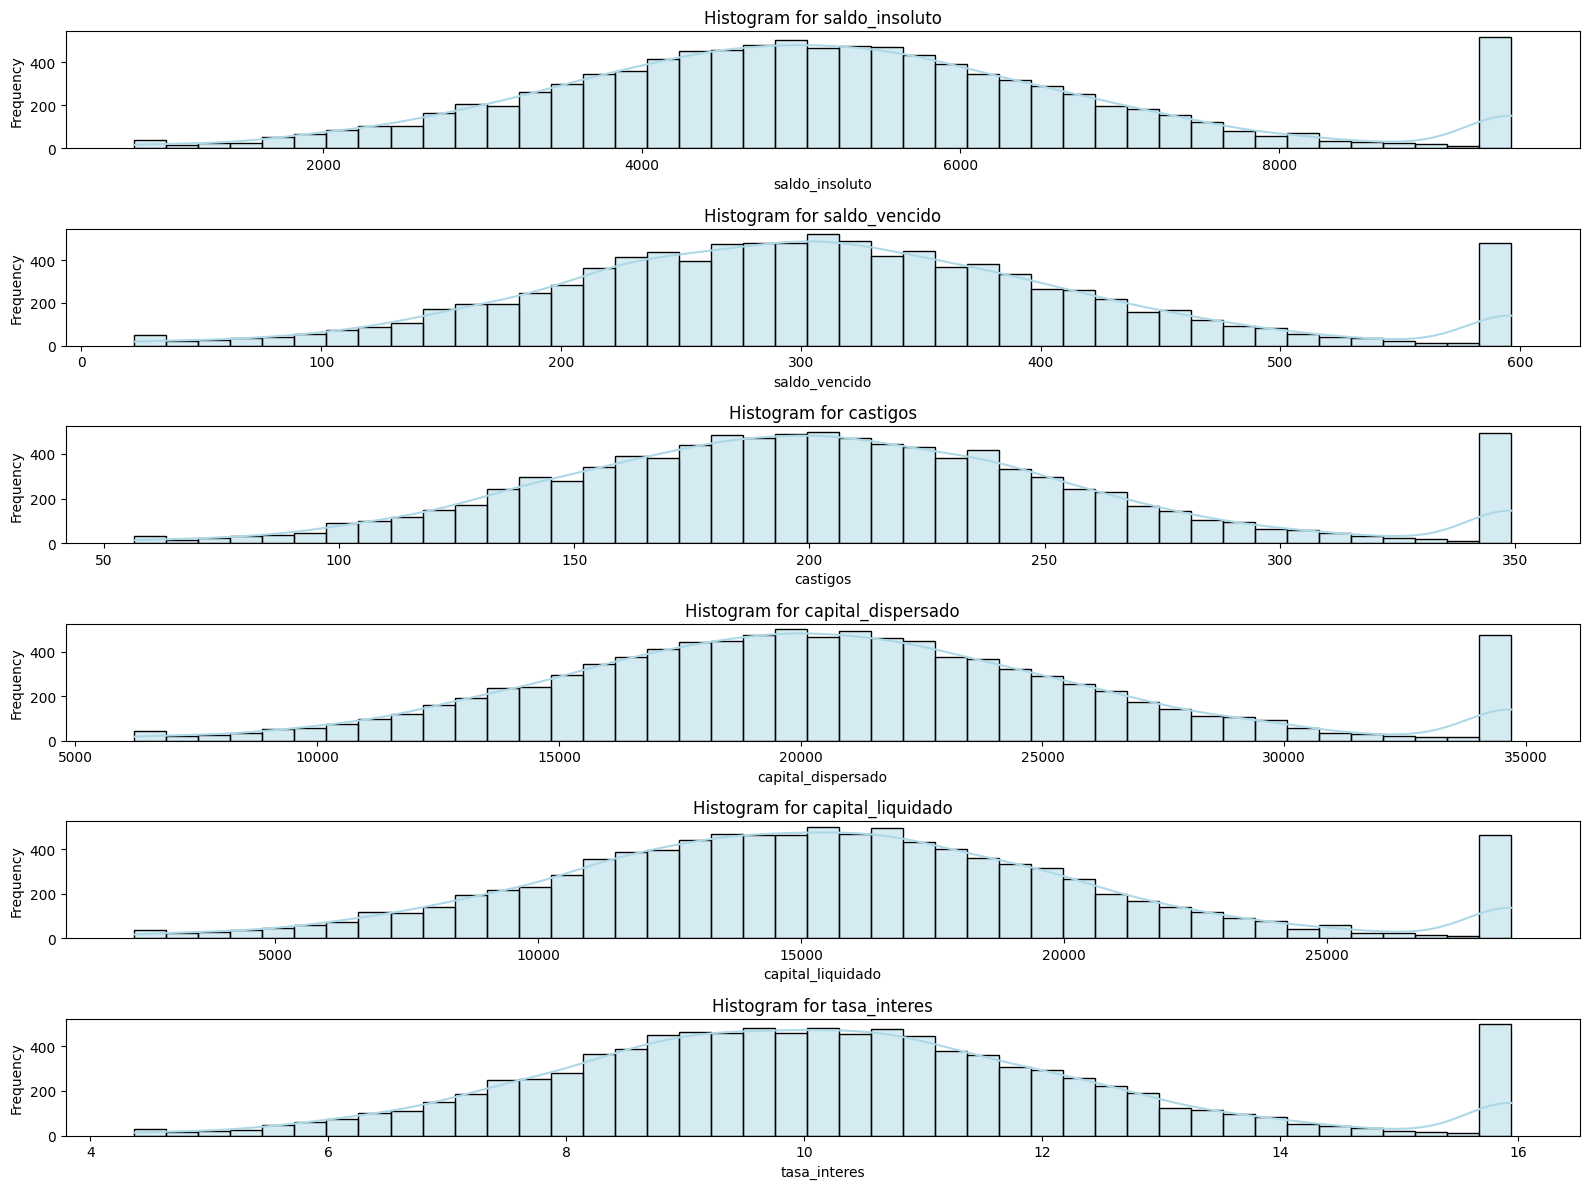

In [11]:
# List float column type
float_columns = loan_df.select_dtypes(include=['float64']).columns.tolist()
float_columns.remove('mora_temprana')

# Identify and correct outliers
for column in float_columns:
    Q1 = loan_df[column].quantile(0.25)
    Q3 = loan_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define limits
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Corect outliers replacing them with limits
    loan_df[column] = np.where(loan_df[column] < lower_bound, lower_bound, loan_df[column])
    loan_df[column] = np.where(loan_df[column] > upper_bound, upper_bound, loan_df[column])

# Gen new boxplots after correction
plt.figure(figsize=(16,12))

for i, column in enumerate(float_columns, 1):
    plt.subplot(len(float_columns), 1, i)
    sns.boxplot(x=loan_df[column], color='lightblue')
    plt.title(f'Boxplot for {column} after correction')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Gen new hist with normal curve adj after correction
plt.figure(figsize=(16, 12))

for i, column in enumerate(float_columns, 1):
    plt.subplot(len(float_columns), 1, i)
    sns.histplot(loan_df[column], kde=True, color='lightblue')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

In [12]:
loan_df.describe()

,saldo_insoluto,saldo_vencido,mora_temprana,castigos,capital_dispersado,capital_liquidado,duracion_prestamo,tasa_interes,estado_prestamo
count,9607.000000,9579.000000,9618.000000,9627.000000,9612.000000,9590.000000,10000.000000,9624.000000,10000.000000
mean,5228.066276,315.243598,0.106883,206.287842,20735.023629,15659.210610,42.671100,10.280646,0.202200
std,1763.307499,115.912270,0.402514,58.933949,5767.250510,5251.714009,34.225147,2.337128,0.401661
min,813.932500,22.117500,0.000000,56.503325,6218.179477,2321.761299,-14.000000,4.370429,0.000000
25%,4055.050000,237.420000,0.000000,166.263952,16896.325447,12139.067263,29.000000,8.709762,0.000000
50%,5095.310000,306.750000,0.000000,202.082546,20328.236745,15366.079690,37.000000,10.102569,0.000000
75%,6215.795000,380.955000,0.000000,239.437704,24015.089427,18683.937905,45.000000,11.602650,0.000000
max,9456.912500,596.257500,5.000000,349.198331,34693.235398,28501.243869,340.000000,15.941982,1.000000


### Null imputation

['saldo_insoluto', 'saldo_vencido', 'castigos', 'capital_dispersado', 'capital_liquidado', 'tasa_interes']


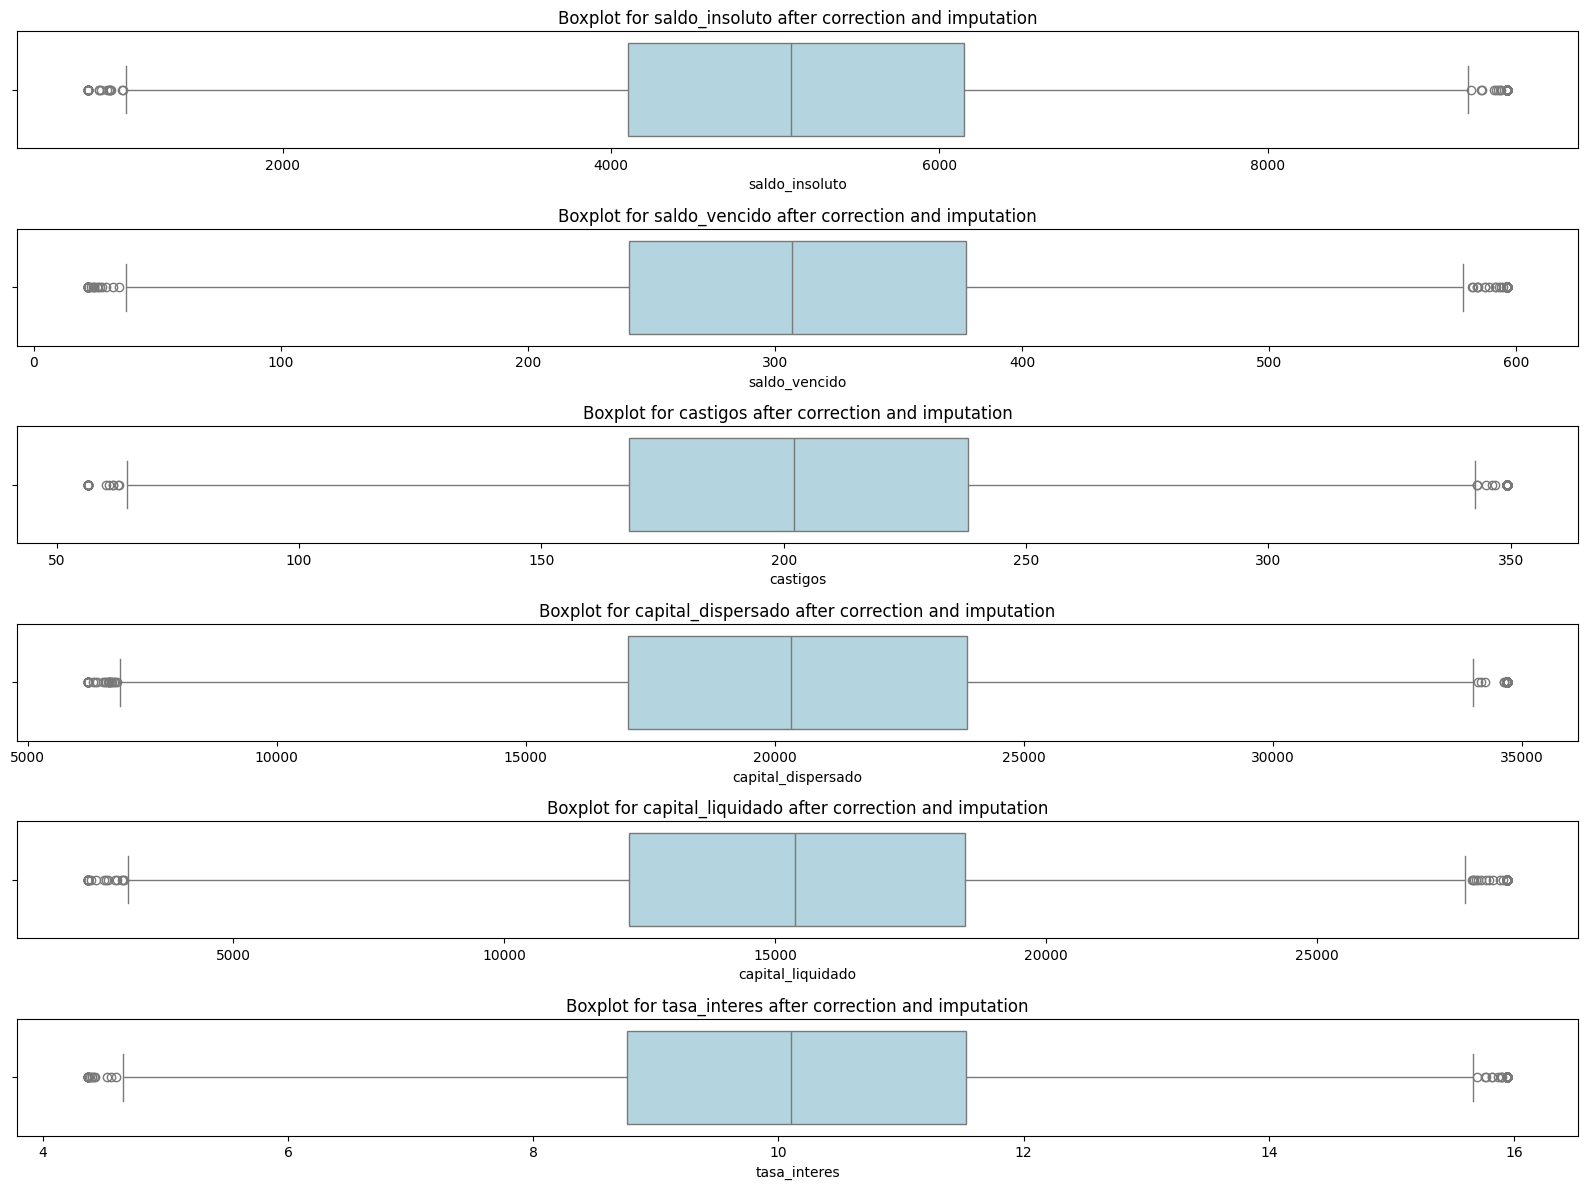

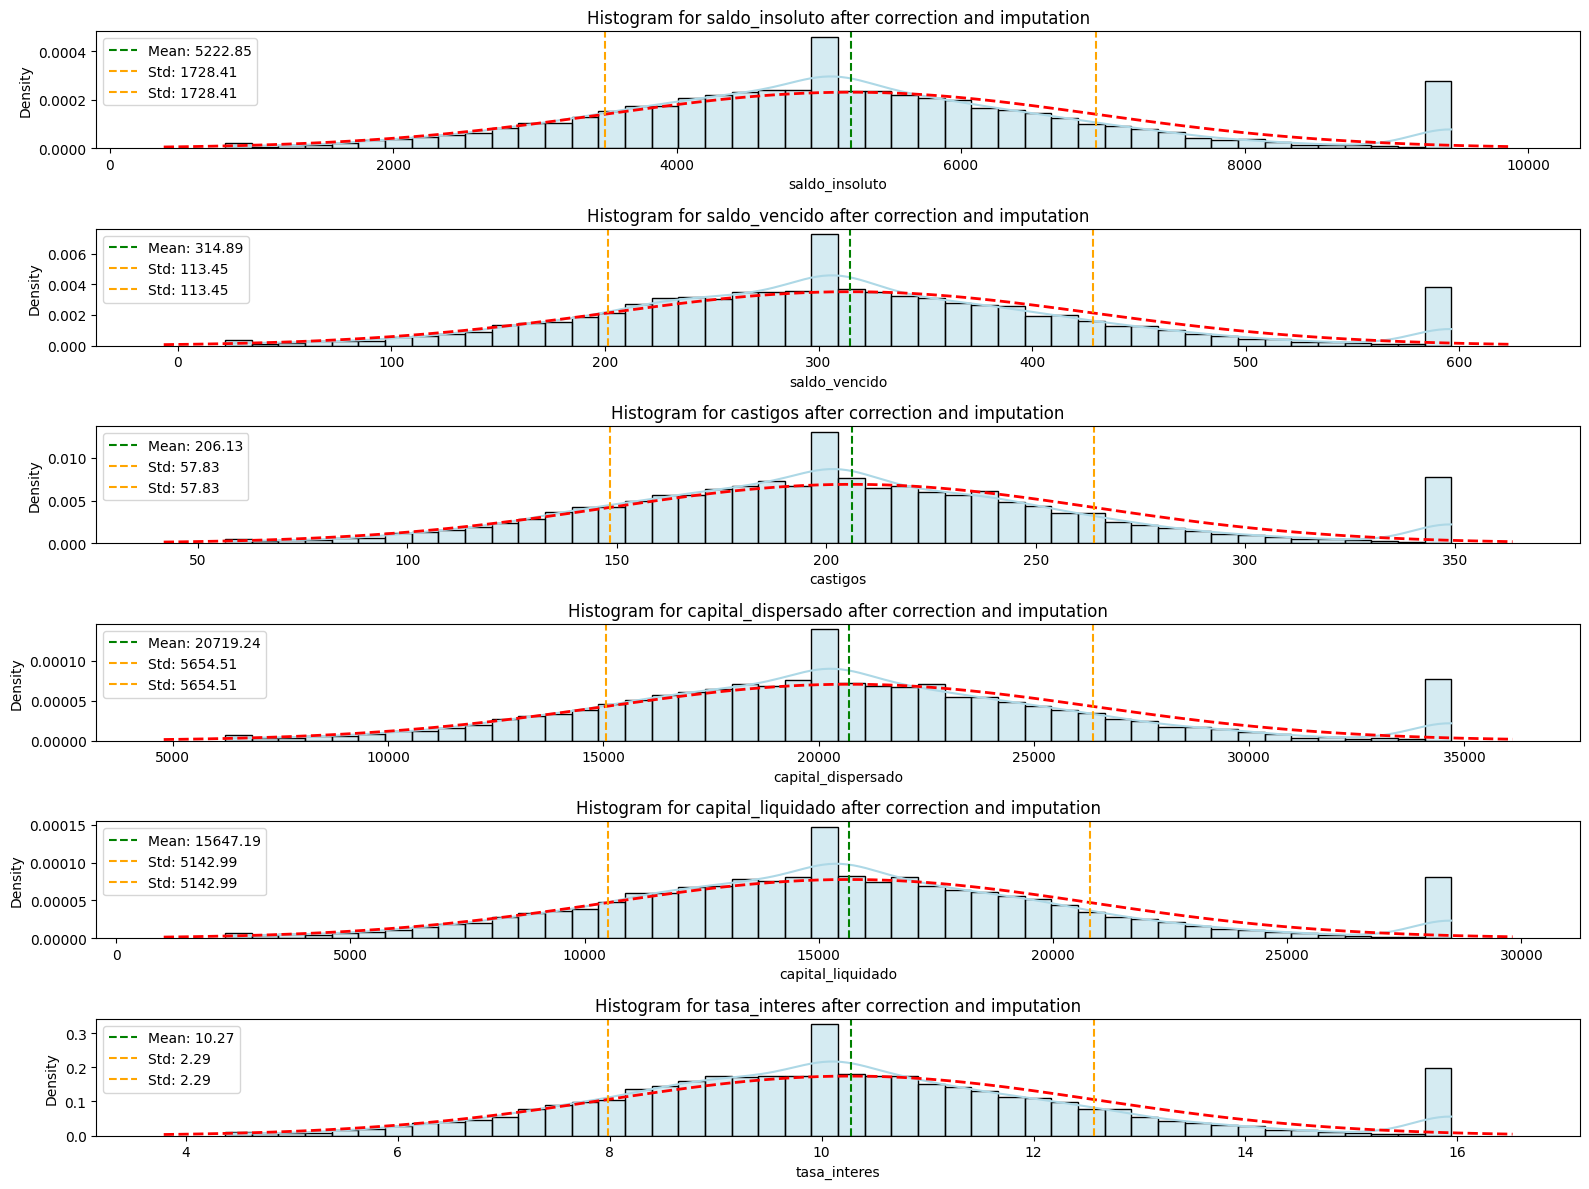

In [14]:
# List columns with float type
float_columns = loan_df.select_dtypes(include=['float64']).columns.tolist()
float_columns.remove('mora_temprana')
print(float_columns)

# Imputation of missing values using median
for column in float_columns:
    median_value = loan_df[column].median()
    loan_df[column].fillna(median_value, inplace=True)

# Gen new boxplots after correction and imputation
plt.figure(figsize=(16,12))

for i, column in enumerate(float_columns, 1):
    plt.subplot(len(float_columns), 1, i)
    sns.boxplot(x=loan_df[column], color='lightblue')
    plt.title(f'Boxplot for {column} after correction and imputation')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

# Gen new hist with normal curve adj after corerction and imputation
plt.figure(figsize=(16, 12))

for i, column in enumerate(float_columns, 1):
    plt.subplot(len(float_columns), 1, i)
    sns.histplot(loan_df[column], kde=True, color='lightblue', stat="density")

    # Fit a normal distribution to the data
    mu, std = stats.norm.fit(loan_df[column])

    # Plot the normal distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)

    # Scale the PDF by the max density of the histogram
    plt.plot(x, p, 'r--', linewidth=2)

    # Draw mean line and standar deviation
    plt.axvline(mu, color='green', linestyle='--', label=f'Mean: {mu:.2f}')
    plt.axvline(mu + std, color='orange', linestyle='--', label=f'Std: {std:.2f}')
    plt.axvline(mu - std, color='orange', linestyle='--', label=f'Std: {std:.2f}')

    plt.title(f'Histogram for {column} after correction and imputation')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

## Load

In [15]:
# Save new data to a csv
loan_df.to_csv('loan_db_imputed.csv', index=False)